# Importaciones relevantes

In [6]:
import requests #para llamar a la API
import pandas #librería para trabajar con tablas
from io import StringIO # para leer texto y pasarlo a pandas
from matplotlib import pyplot as plt

# Usando el Meteorology Query de La Silla

Los datos vienen en formato`csv` o valores separados por comas (**c**oma **s**eparated **v**alue) y lo alimentaremos a nuestra herramienta `pandas` para leerlo como tablar. En este bloque de código se obtienen datospara un rango de fechas `start_date` yy`end_date`, además de especificar el máximo de filas que se devolverán en la llamada `max_rows_returned`. Los datos quedan almacenados en la tabla `weather_data`..

In [7]:
start_date = "2025-10-14"
end_date = "2025-10-16"
max_rows_returned = 20000
url = f"https://archive.eso.org/wdb/wdb/asm/meteo_lasilla/query?wdbo=csv&max_rows_returned={max_rows_returned}&start_date={start_date}..{end_date}"
# url = f'https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m,precipitation_probability'

_response = requests.get(url)
response = _response.text
weather_data = pandas.read_table(StringIO(response),sep=",",index_col=0).dropna(axis=1,how="all") # dropna borra los valores NaN de la tabla
weather_data.describe() # muestra las primeras cinco filas

,Air Pressure at 2m [hPa],Ambient Temperature at 2m [C],Dew Temperature at 2m [C],Relative Humidity at 2m [%],Wind Direction at 10m [deg],Wind Speed at 10m [m/s]
count,2874.000000,2874.000000,2874.000000,2874.000000,2873.000000,2873.000000
mean,768.427279,11.931246,-4.547530,17.606124,56.474417,11.199095
std,0.883586,2.206819,1.737553,6.798582,85.975021,3.686483
min,766.700000,6.100000,-8.700000,8.000000,0.000000,1.900000
25%,767.900000,10.500000,-5.800000,14.000000,20.000000,8.300000
50%,768.200000,12.000000,-4.700000,16.000000,35.000000,11.400000
75%,769.100000,13.600000,-3.400000,21.000000,45.000000,13.700000
max,770.300000,16.300000,-0.700000,44.000000,359.000000,22.200000


La lista completa de parámetros que puede recibir la query es: `max_rows_returned=10^&start_date=^%^3E2025-07-15^&integration=^&tab_press=on^&press=^&tab_presqnh=on^&presqnh=^&tab_temp1=on^&temp1=^&tab_temp2=on^&temp2=^&tab_temp3=on^&temp3=^&tab_tempdew2=on^&tempdew2=^&tab_rhum2=on^&rhum2=^&tab_wind_dir1=on^&wind_dir1=^&tab_wind_dir2=on^&wind_dir2=^&tab_wind_speed1=on^&wind_speed1=^&tab_wind_speed2=on^&wind_speed2=^&order=start_date^`

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '2025-10-15T15:45:35'),
  Text(0.0, 0, '2025-10-14T00:00:34'),
  Text(500.0, 0, '2025-10-14T08:20:34'),
  Text(1000.0, 0, '2025-10-14T16:43:35'),
  Text(1500.0, 0, '2025-10-15T01:03:35'),
  Text(2000.0, 0, '2025-10-15T09:23:35'),
  Text(2500.0, 0, '2025-10-15T17:46:35'),
  Text(3000.0, 0, ''),
  Text(3500.0, 0, '')])

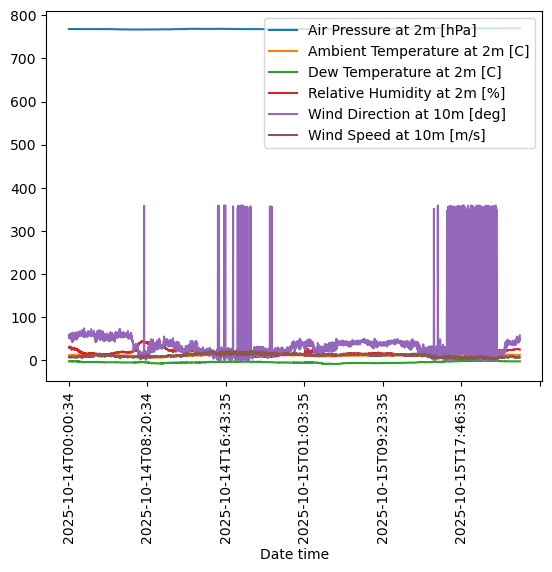

In [12]:
weather_data.plot().legend(loc=1)
plt.xticks(rotation=90)

Dado que los nombres de las variables son muy largas, vamos a introducir algunos *alias* para llamarlas con facilidad

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '2025-10-15T15:45:35'),
  Text(0.0, 0, '2025-10-14T00:00:34'),
  Text(500.0, 0, '2025-10-14T08:20:34'),
  Text(1000.0, 0, '2025-10-14T16:43:35'),
  Text(1500.0, 0, '2025-10-15T01:03:35'),
  Text(2000.0, 0, '2025-10-15T09:23:35'),
  Text(2500.0, 0, '2025-10-15T17:46:35'),
  Text(3000.0, 0, ''),
  Text(3500.0, 0, '')])

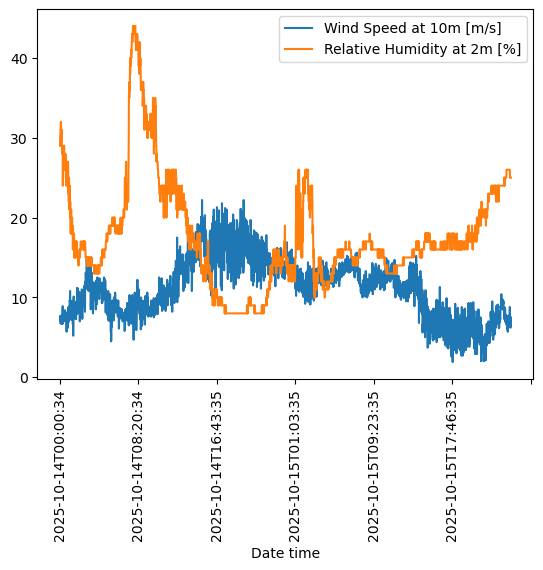

In [13]:
air_pressure = "Air Pressure at 2m [hPa]"
temperature = "Ambient Temperature at 2m [C]"
humidity = "Relative Humidity at 2m [%]"
wind_speed = "Wind Speed at 10m [m/s]"
weather_data.plot(y=[wind_speed,humidity])
plt.xticks(rotation=90)

<Axes: xlabel='Ambient Temperature at 2m [C]', ylabel='Relative Humidity at 2m [%]'>

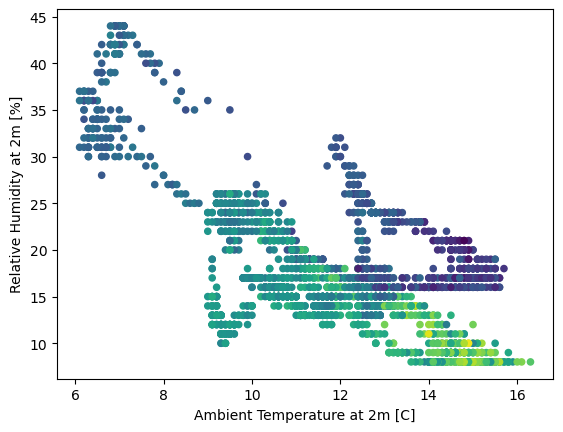

In [19]:
weather_data.plot.scatter(x=temperature,y=humidity,color=weather_data[wind_speed])

Podemos estudiar la correlación entre las variables con la **matriz de correlación**. En este caso, se ve que la humedad y la temperatura tienen una correlación negativa débil y la probabilidad de precipitación con la humedad, positiva y débil. Los valores de esta matriz van desde -1 a 1: -1 para correlación total negativa, y 1 para correlación total positiva (por eso en la diagonal hay sólo valores 1). Esto lo podemos comparar con sus gráficas.

In [20]:
weather_data.corr(numeric_only=True)

,Air Pressure at 2m [hPa],Ambient Temperature at 2m [C],Dew Temperature at 2m [C],Relative Humidity at 2m [%],Wind Direction at 10m [deg],Wind Speed at 10m [m/s]
Air Pressure at 2m [hPa],1.000000,0.507115,0.470450,-0.221869,0.303413,-0.337613
Ambient Temperature at 2m [C],0.507115,1.000000,0.787634,-0.616498,0.320803,0.026749
Dew Temperature at 2m [C],0.470450,0.787634,1.000000,-0.000451,0.379412,-0.370895
Relative Humidity at 2m [%],-0.221869,-0.616498,-0.000451,1.000000,-0.035689,-0.517494
Wind Direction at 10m [deg],0.303413,0.320803,0.379412,-0.035689,1.000000,-0.351129
Wind Speed at 10m [m/s],-0.337613,0.026749,-0.370895,-0.517494,-0.351129,1.000000


A esta tabla le podemos agregar columnas, por ejemplo, la temperatura del punto de rocío $T_{dp}$, con $T$ la temperatura y $RH$ la humedad relativa. Esta se calcula con $T_{dp} = T-(100-RH)/5$.

In [21]:
weather_data['dew_point']=weather_data[temperature]-(100-weather_data[humidity])/5

In [22]:
weather_data.describe()

,Air Pressure at 2m [hPa],Ambient Temperature at 2m [C],Dew Temperature at 2m [C],Relative Humidity at 2m [%],Wind Direction at 10m [deg],Wind Speed at 10m [m/s],dew_point
count,2874.000000,2874.000000,2874.000000,2874.000000,2873.000000,2873.000000,2874.000000
mean,768.427279,11.931246,-4.547530,17.606124,56.474417,11.199095,-4.547530
std,0.883586,2.206819,1.737553,6.798582,85.975021,3.686483,1.737553
min,766.700000,6.100000,-8.700000,8.000000,0.000000,1.900000,-8.700000
25%,767.900000,10.500000,-5.800000,14.000000,20.000000,8.300000,-5.800000
50%,768.200000,12.000000,-4.700000,16.000000,35.000000,11.400000,-4.700000
75%,769.100000,13.600000,-3.400000,21.000000,45.000000,13.700000,-3.400000
max,770.300000,16.300000,-0.700000,44.000000,359.000000,22.200000,-0.700000


<Axes: xlabel='Date time'>

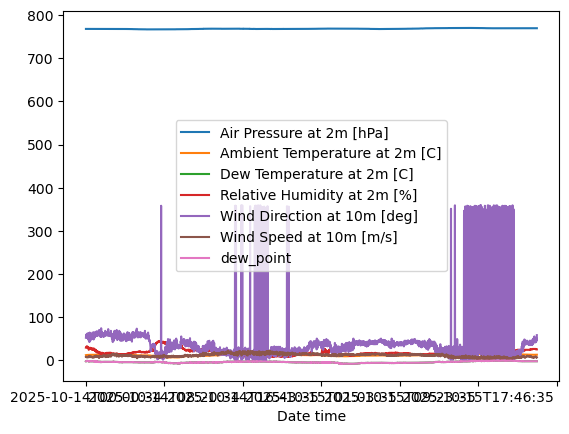

In [23]:
weather_data.plot()

<Axes: xlabel='Ambient Temperature at 2m [C]', ylabel='Relative Humidity at 2m [%]'>

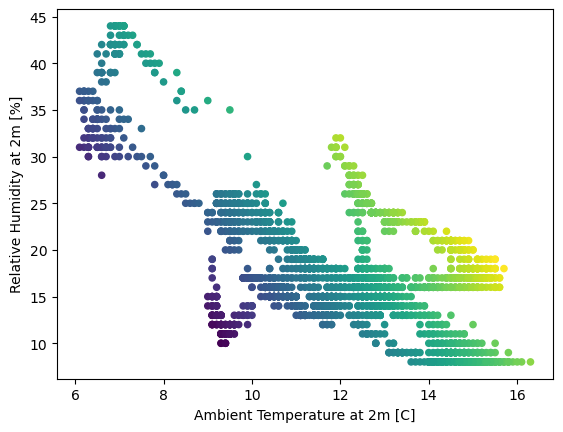

In [26]:
weather_data.plot.scatter(x=temperature,y=humidity,color=weather_data['dew_point'])

In [27]:
weather_data.corr()

,Air Pressure at 2m [hPa],Ambient Temperature at 2m [C],Dew Temperature at 2m [C],Relative Humidity at 2m [%],Wind Direction at 10m [deg],Wind Speed at 10m [m/s],dew_point
Air Pressure at 2m [hPa],1.000000,0.507115,0.470450,-0.221869,0.303413,-0.337613,0.470450
Ambient Temperature at 2m [C],0.507115,1.000000,0.787634,-0.616498,0.320803,0.026749,0.787634
Dew Temperature at 2m [C],0.470450,0.787634,1.000000,-0.000451,0.379412,-0.370895,1.000000
Relative Humidity at 2m [%],-0.221869,-0.616498,-0.000451,1.000000,-0.035689,-0.517494,-0.000451
Wind Direction at 10m [deg],0.303413,0.320803,0.379412,-0.035689,1.000000,-0.351129,0.379412
Wind Speed at 10m [m/s],-0.337613,0.026749,-0.370895,-0.517494,-0.351129,1.000000,-0.370895
dew_point,0.470450,0.787634,1.000000,-0.000451,0.379412,-0.370895,1.000000


La correlación entre el punto de rocío y la humedad es alta.